# Predicting Human Activity Using Machine Learning

# 1.Goal Definition

The goal of our project, it’s to create a predictable Machine Learning model which will be able to categories a specific human’s activity sensor data into the appropriate class by using features extracted from raw sensor date (Walking, Jumping and Drop & Pick up).

# 2.Data

Data for all three activities (Walking, Jumping and Drop & Pick Up) were obtained from the acceleration, magnetic field, orientation and angular velocity sensors of the iPhone 11 Pro Max.

The MATLAB application was used to collect the sensor data from the iPhone. All three activities were logged for two (2) minutes and thirty (30) seconds with the sampling frequency of 20 Hz (One hertz is a unit of measurement that equals one cycle per second).

# 3.Evaluation

If we could reach some accuracy for example 90% accuracy at predicting Walking or Jumping or Drop & Pick up object .

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
import datetime as dt

In [2]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.grid(False)
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

# Drop & Pick up Activity

In [3]:
Dp_Mag_F=pd.read_excel(' Droping _MagneticField.xlsx')
Dp_Orient=pd.read_excel(' Droping _Orientation.xlsx')
Dp_Accel=pd.read_excel('Droping_Acceleration.xlsx')
Dp_An_Vel=pd.read_excel('Droping_AngularVelo.xlsx')

# Walking Activity

In [4]:
W_Mag_F=pd.read_excel('Walking_MagneticField.xlsx')
W_Orient=pd.read_excel('Walking_Orientation.xlsx')
W_Accel=pd.read_excel('Walking_Acceleration.xlsx')
W_An_Vel=pd.read_excel('Walking_AngularVelo.xlsx')

# Jumping Activity

In [5]:
J_Mag_F=pd.read_excel('Jumping_MagneticField.xlsx')
J_Orient=pd.read_excel('Jumping_Orientation.xlsx')
J_Accel=pd.read_excel('Jumping_Acceleration.xlsx')
J_An_Vel=pd.read_excel('Jumping_AngularVelo.xlsx')

# Checking the head of the dataframes

# Drop & Pick up Activity

In [6]:
Dp_Mag_F.head(5)

,Timestamp,Mag_X,Mag_Y,Mag_Z
0,2021-10-14 13:40:21.313,-6.839157,-33.814117,-15.594273
1,2021-10-14 13:40:21.363,-6.893135,-33.899960,-15.393707
2,2021-10-14 13:40:21.414,-7.255005,-33.819160,-15.255764
3,2021-10-14 13:40:21.464,-7.396950,-33.735928,-16.084511
4,2021-10-14 13:40:21.514,-7.908173,-33.489986,-15.796833


In [7]:
Dp_Orient.head(5)

,Timestamp,Orin_X,Orin_Y,Orin_Z
0,2021-10-14 13:40:21.313,127.911828,-87.230436,179.978090
1,2021-10-14 13:40:21.363,127.833119,-87.452951,179.300691
2,2021-10-14 13:40:21.414,128.428930,-87.948594,178.880301
3,2021-10-14 13:40:21.464,131.649373,-88.322716,-179.716323
4,2021-10-14 13:40:21.514,130.353466,-88.917042,176.731065


In [8]:
Dp_Accel.head(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874
1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024
2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739
3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652
4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734


In [9]:
Dp_An_Vel.head(5)

,Timestamp,AngV_X,AngV_Y,AngV_Z
0,2021-10-14 13:40:21.339,-0.069952,-0.220849,-0.001008
1,2021-10-14 13:40:21.389,-0.178261,-0.403390,0.031440
2,2021-10-14 13:40:21.439,-0.089927,-0.568693,0.044264
3,2021-10-14 13:40:21.489,-0.216975,-0.775759,-0.039224
4,2021-10-14 13:40:21.540,-0.187594,-0.837408,0.104411


# Walking Activity

In [10]:
W_Mag_F.head(5)

,Timestamp,Mag_X,Mag_Y,Mag_Z
0,2021-10-14 09:25:06.177,-2.423294,16.009617,-43.896179
1,2021-10-14 09:25:06.227,-3.130608,15.421608,-43.326736
2,2021-10-14 09:25:06.278,-3.820793,15.114445,-43.730804
3,2021-10-14 09:25:06.328,-3.117348,13.319328,-45.282173
4,2021-10-14 09:25:06.378,-2.271935,12.941742,-45.559692


In [11]:
W_Orient.head(5)

,Timestamp,Orin_X,Orin_Y,Orin_Z
0,2021-10-14 09:25:06.177,-95.617354,-8.648822,10.963670
1,2021-10-14 09:25:06.227,-96.189365,-9.461931,8.526960
2,2021-10-14 09:25:06.278,-97.239296,-11.147577,6.460742
3,2021-10-14 09:25:06.328,-99.324624,-13.625673,5.609987
4,2021-10-14 09:25:06.378,-101.356529,-14.217485,5.195244


In [12]:
W_Accel.head(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2021-10-14 09:25:06.212,-3.292553,1.364113,9.853859
1,2021-10-14 09:25:06.262,-1.198258,0.710872,9.671388
2,2021-10-14 09:25:06.313,-2.301015,1.225202,6.782097
3,2021-10-14 09:25:06.363,-1.439856,2.595453,5.928571
4,2021-10-14 09:25:06.413,-1.362317,2.251618,7.570956


In [13]:
W_An_Vel.head(5)

,Timestamp,AngV_X,AngV_Y,AngV_Z
0,2021-10-14 09:25:06.212,0.274733,-1.029873,0.129763
1,2021-10-14 09:25:06.262,0.571236,-0.511573,0.335067
2,2021-10-14 09:25:06.312,0.838088,-0.145996,0.734803
3,2021-10-14 09:25:06.363,0.004879,0.009774,0.505894
4,2021-10-14 09:25:06.413,-0.138253,0.392856,0.492376


# Jumping Activity

In [14]:
J_Mag_F.head(5)

,Timestamp,Mag_X,Mag_Y,Mag_Z
0,2021-10-14 13:17:29.492,-6.813377,-22.568199,-36.793198
1,2021-10-14 13:17:29.543,-6.914787,-22.786158,-36.182678
2,2021-10-14 13:17:29.593,-6.694801,-23.026453,-36.266464
3,2021-10-14 13:17:29.643,-7.186531,-23.298979,-35.764175
4,2021-10-14 13:17:29.693,-6.834206,-24.015612,-35.171967


In [15]:
J_Orient.head(5)

,Timestamp,Orin_X,Orin_Y,Orin_Z
0,2021-10-14 13:17:29.493,-90.604425,-19.747128,2.927196
1,2021-10-14 13:17:29.543,-90.616514,-20.260241,3.048790
2,2021-10-14 13:17:29.593,-90.573177,-20.651665,2.829650
3,2021-10-14 13:17:29.643,-90.131362,-20.950877,2.519338
4,2021-10-14 13:17:29.694,-89.716092,-21.834321,2.833543


In [16]:
J_Accel.head(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2021-10-14 13:17:29.442,-0.498463,3.242258,8.910820
1,2021-10-14 13:17:29.492,-0.471220,3.390300,9.443412
2,2021-10-14 13:17:29.543,-0.309556,3.342100,9.281150
3,2021-10-14 13:17:29.593,0.014969,3.126249,9.209299
4,2021-10-14 13:17:29.643,0.053589,3.424579,9.455836


In [17]:
J_An_Vel.head(5)

,Timestamp,AngV_X,AngV_Y,AngV_Z
0,2021-10-14 13:17:29.497,-0.114077,0.002408,-0.000256
1,2021-10-14 13:17:29.548,0.305937,-0.034034,0.053206
2,2021-10-14 13:17:29.598,0.035775,-0.160198,-0.082874
3,2021-10-14 13:17:29.648,0.225975,-0.154054,-0.190965
4,2021-10-14 13:17:29.698,0.447876,0.246137,0.050570


# Droping all timestamps in Magnetic, AngularVelocity and Orientation Dataframes; Leaving "Timestamp" for the Acceleration dataframe

# Drop & Pick up Activity

In [18]:
Dp_Mag_F=Dp_Mag_F.drop('Timestamp',axis=1)
Dp_Orient=Dp_Orient.drop('Timestamp',axis=1)
Dp_An_Vel=Dp_An_Vel.drop('Timestamp',axis=1)

# Walking Activity

In [19]:
W_Mag_F=W_Mag_F.drop('Timestamp',axis=1)
W_Orient=W_Orient.drop('Timestamp',axis=1)
W_An_Vel=W_An_Vel.drop('Timestamp',axis=1)

# Jumping Activity

In [20]:
J_Mag_F=J_Mag_F.drop('Timestamp',axis=1)
J_Orient=J_Orient.drop('Timestamp',axis=1)
J_An_Vel=J_An_Vel.drop('Timestamp',axis=1)

# Combining all dataframes related to the specific activity

# Drop & Pick up Activity

In [21]:
all_data_1=[Dp_Accel,Dp_Mag_F,Dp_Orient,Dp_An_Vel]

In [22]:
DP_activity=pd.concat(all_data_1,axis=1)

In [23]:
DP_activity.head(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z
0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008
1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440
2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264
3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224
4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411


# Walking Activity

In [24]:
all_data_2=[W_Accel,W_Mag_F,W_Orient,W_An_Vel]

In [25]:
W_activity=pd.concat(all_data_2,axis=1)

In [26]:
W_activity.head(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z
0,2021-10-14 09:25:06.212,-3.292553,1.364113,9.853859,-2.423294,16.009617,-43.896179,-95.617354,-8.648822,10.963670,0.274733,-1.029873,0.129763
1,2021-10-14 09:25:06.262,-1.198258,0.710872,9.671388,-3.130608,15.421608,-43.326736,-96.189365,-9.461931,8.526960,0.571236,-0.511573,0.335067
2,2021-10-14 09:25:06.313,-2.301015,1.225202,6.782097,-3.820793,15.114445,-43.730804,-97.239296,-11.147577,6.460742,0.838088,-0.145996,0.734803
3,2021-10-14 09:25:06.363,-1.439856,2.595453,5.928571,-3.117348,13.319328,-45.282173,-99.324624,-13.625673,5.609987,0.004879,0.009774,0.505894
4,2021-10-14 09:25:06.413,-1.362317,2.251618,7.570956,-2.271935,12.941742,-45.559692,-101.356529,-14.217485,5.195244,-0.138253,0.392856,0.492376


# Jumping Activity

In [27]:
all_data_3=[J_Accel,J_Mag_F,J_Orient,J_An_Vel]

In [28]:
J_activity=pd.concat(all_data_3,axis=1)

In [29]:
J_activity.head(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z
0,2021-10-14 13:17:29.442,-0.498463,3.242258,8.910820,-6.813377,-22.568199,-36.793198,-90.604425,-19.747128,2.927196,-0.114077,0.002408,-0.000256
1,2021-10-14 13:17:29.492,-0.471220,3.390300,9.443412,-6.914787,-22.786158,-36.182678,-90.616514,-20.260241,3.048790,0.305937,-0.034034,0.053206
2,2021-10-14 13:17:29.543,-0.309556,3.342100,9.281150,-6.694801,-23.026453,-36.266464,-90.573177,-20.651665,2.829650,0.035775,-0.160198,-0.082874
3,2021-10-14 13:17:29.593,0.014969,3.126249,9.209299,-7.186531,-23.298979,-35.764175,-90.131362,-20.950877,2.519338,0.225975,-0.154054,-0.190965
4,2021-10-14 13:17:29.643,0.053589,3.424579,9.455836,-6.834206,-24.015612,-35.171967,-89.716092,-21.834321,2.833543,0.447876,0.246137,0.050570


# Labelling All Dataframes

# Drop & Pick up Activity

In [30]:
DP_activity['Activity']='Drop&Pickup'
DP_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2893 non-null   datetime64[ns]
 1   Acc_X      2893 non-null   float64       
 2   Acc_Y      2893 non-null   float64       
 3   Acc_Z      2893 non-null   float64       
 4   Mag_X      2893 non-null   float64       
 5   Mag_Y      2893 non-null   float64       
 6   Mag_Z      2893 non-null   float64       
 7   Orin_X     2893 non-null   float64       
 8   Orin_Y     2892 non-null   float64       
 9   Orin_Z     2893 non-null   float64       
 10  AngV_X     2896 non-null   float64       
 11  AngV_Y     2896 non-null   float64       
 12  AngV_Z     2896 non-null   float64       
 13  Activity   2896 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 316.9+ KB


# Walking Activity

In [31]:
W_activity['Activity']='Walking'
W_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2996 non-null   datetime64[ns]
 1   Acc_X      2996 non-null   float64       
 2   Acc_Y      2996 non-null   float64       
 3   Acc_Z      2996 non-null   float64       
 4   Mag_X      2997 non-null   float64       
 5   Mag_Y      2997 non-null   float64       
 6   Mag_Z      2997 non-null   float64       
 7   Orin_X     2997 non-null   float64       
 8   Orin_Y     2997 non-null   float64       
 9   Orin_Z     2997 non-null   float64       
 10  AngV_X     2996 non-null   float64       
 11  AngV_Y     2996 non-null   float64       
 12  AngV_Z     2996 non-null   float64       
 13  Activity   2997 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 327.9+ KB


# Jumping Activity

In [32]:
J_activity['Activity']='Jumping'
J_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2725 non-null   datetime64[ns]
 1   Acc_X      2725 non-null   float64       
 2   Acc_Y      2725 non-null   float64       
 3   Acc_Z      2725 non-null   float64       
 4   Mag_X      2724 non-null   float64       
 5   Mag_Y      2724 non-null   float64       
 6   Mag_Z      2724 non-null   float64       
 7   Orin_X     2724 non-null   float64       
 8   Orin_Y     2724 non-null   float64       
 9   Orin_Z     2724 non-null   float64       
 10  AngV_X     2724 non-null   float64       
 11  AngV_Y     2724 non-null   float64       
 12  AngV_Z     2724 non-null   float64       
 13  Activity   2725 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 298.2+ KB


# Combining all(3) activities in one dataset

In [33]:
all_activities=[DP_activity,W_activity,J_activity]

In [34]:
df_activities=pd.concat(all_activities,axis=0)

In [35]:
df_activities.head(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008,Drop&Pickup
1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440,Drop&Pickup
2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264,Drop&Pickup
3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224,Drop&Pickup
4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411,Drop&Pickup


In [36]:
df_activities.tail(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
2720,2021-10-14 13:19:46.121,0.482746,8.904982,4.162245,16.579750,-28.217545,-25.513298,67.962617,-65.495209,-6.806262,0.135542,0.227402,0.231113,Jumping
2721,2021-10-14 13:19:46.171,1.081052,8.926986,4.083808,16.610832,-28.865643,-24.922562,66.665646,-65.646607,-7.396535,0.133819,0.090380,0.086350,Jumping
2722,2021-10-14 13:19:46.222,0.831820,8.728200,4.439618,16.594696,-29.028034,-24.468300,65.755989,-66.379555,-8.060789,0.324767,0.095359,0.129784,Jumping
2723,2021-10-14 13:19:46.272,0.701591,8.834329,4.130960,16.423515,-29.269581,-24.401260,65.094437,-66.870688,-8.023851,-0.069101,0.319891,0.045476,Jumping
2724,2021-10-14 13:19:46.322,0.906515,9.321416,3.595822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumping


In [37]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8618 entries, 0 to 2724
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  8614 non-null   datetime64[ns]
 1   Acc_X      8614 non-null   float64       
 2   Acc_Y      8614 non-null   float64       
 3   Acc_Z      8614 non-null   float64       
 4   Mag_X      8614 non-null   float64       
 5   Mag_Y      8614 non-null   float64       
 6   Mag_Z      8614 non-null   float64       
 7   Orin_X     8614 non-null   float64       
 8   Orin_Y     8613 non-null   float64       
 9   Orin_Z     8614 non-null   float64       
 10  AngV_X     8616 non-null   float64       
 11  AngV_Y     8616 non-null   float64       
 12  AngV_Z     8616 non-null   float64       
 13  Activity   8618 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1009.9+ KB


In [38]:
df_activities.to_csv('Master DataSet')

# Reseting the index

In [39]:
df_activities=df_activities.reset_index()

In [40]:
df_activities

,index,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
0,0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008,Drop&Pickup
1,1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440,Drop&Pickup
2,2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264,Drop&Pickup
3,3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224,Drop&Pickup
4,4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411,Drop&Pickup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,2720,2021-10-14 13:19:46.121,0.482746,8.904982,4.162245,16.579750,-28.217545,-25.513298,67.962617,-65.495209,-6.806262,0.135542,0.227402,0.231113,Jumping
8614,2721,2021-10-14 13:19:46.171,1.081052,8.926986,4.083808,16.610832,-28.865643,-24.922562,66.665646,-65.646607,-7.396535,0.133819,0.090380,0.086350,Jumping
8615,2722,2021-10-14 13:19:46.222,0.831820,8.728200,4.439618,16.594696,-29.028034,-24.468300,65.755989,-66.379555,-8.060789,0.324767,0.095359,0.129784,Jumping
8616,2723,2021-10-14 13:19:46.272,0.701591,8.834329,4.130960,16.423515,-29.269581,-24.401260,65.094437,-66.870688,-8.023851,-0.069101,0.319891,0.045476,Jumping


In [41]:
df_activities['Activity'].unique()

array(['Drop&Pickup', 'Walking', 'Jumping'], dtype=object)

In [42]:
df_activities=df_activities.drop('index',axis=1)

In [43]:
df_activities.tail(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
8613,2021-10-14 13:19:46.121,0.482746,8.904982,4.162245,16.579750,-28.217545,-25.513298,67.962617,-65.495209,-6.806262,0.135542,0.227402,0.231113,Jumping
8614,2021-10-14 13:19:46.171,1.081052,8.926986,4.083808,16.610832,-28.865643,-24.922562,66.665646,-65.646607,-7.396535,0.133819,0.090380,0.086350,Jumping
8615,2021-10-14 13:19:46.222,0.831820,8.728200,4.439618,16.594696,-29.028034,-24.468300,65.755989,-66.379555,-8.060789,0.324767,0.095359,0.129784,Jumping
8616,2021-10-14 13:19:46.272,0.701591,8.834329,4.130960,16.423515,-29.269581,-24.401260,65.094437,-66.870688,-8.023851,-0.069101,0.319891,0.045476,Jumping
8617,2021-10-14 13:19:46.322,0.906515,9.321416,3.595822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumping


In [44]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  8614 non-null   datetime64[ns]
 1   Acc_X      8614 non-null   float64       
 2   Acc_Y      8614 non-null   float64       
 3   Acc_Z      8614 non-null   float64       
 4   Mag_X      8614 non-null   float64       
 5   Mag_Y      8614 non-null   float64       
 6   Mag_Z      8614 non-null   float64       
 7   Orin_X     8614 non-null   float64       
 8   Orin_Y     8613 non-null   float64       
 9   Orin_Z     8614 non-null   float64       
 10  AngV_X     8616 non-null   float64       
 11  AngV_Y     8616 non-null   float64       
 12  AngV_Z     8616 non-null   float64       
 13  Activity   8618 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 942.7+ KB


# Checking all NaN values

In [45]:
df_activities.isna().sum()

Timestamp    4
Acc_X        4
Acc_Y        4
Acc_Z        4
Mag_X        4
Mag_Y        4
Mag_Z        4
Orin_X       4
Orin_Y       5
Orin_Z       4
AngV_X       2
AngV_Y       2
AngV_Z       2
Activity     0
dtype: int64

In [46]:
df_activities=df_activities.dropna()

In [47]:
df_activities.isna().sum()

Timestamp    0
Acc_X        0
Acc_Y        0
Acc_Z        0
Mag_X        0
Mag_Y        0
Mag_Z        0
Orin_X       0
Orin_Y       0
Orin_Z       0
AngV_X       0
AngV_Y       0
AngV_Z       0
Activity     0
dtype: int64

In [48]:
df_activities

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008,Drop&Pickup
1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440,Drop&Pickup
2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264,Drop&Pickup
3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224,Drop&Pickup
4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411,Drop&Pickup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,2021-10-14 13:19:46.071,0.419727,9.125324,4.503086,16.945076,-28.041767,-25.402069,69.826281,-64.941972,-5.502031,0.235801,0.013511,0.289482,Jumping
8613,2021-10-14 13:19:46.121,0.482746,8.904982,4.162245,16.579750,-28.217545,-25.513298,67.962617,-65.495209,-6.806262,0.135542,0.227402,0.231113,Jumping
8614,2021-10-14 13:19:46.171,1.081052,8.926986,4.083808,16.610832,-28.865643,-24.922562,66.665646,-65.646607,-7.396535,0.133819,0.090380,0.086350,Jumping
8615,2021-10-14 13:19:46.222,0.831820,8.728200,4.439618,16.594696,-29.028034,-24.468300,65.755989,-66.379555,-8.060789,0.324767,0.095359,0.129784,Jumping


In [49]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8612 entries, 0 to 8616
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  8612 non-null   datetime64[ns]
 1   Acc_X      8612 non-null   float64       
 2   Acc_Y      8612 non-null   float64       
 3   Acc_Z      8612 non-null   float64       
 4   Mag_X      8612 non-null   float64       
 5   Mag_Y      8612 non-null   float64       
 6   Mag_Z      8612 non-null   float64       
 7   Orin_X     8612 non-null   float64       
 8   Orin_Y     8612 non-null   float64       
 9   Orin_Z     8612 non-null   float64       
 10  AngV_X     8612 non-null   float64       
 11  AngV_Y     8612 non-null   float64       
 12  AngV_Z     8612 non-null   float64       
 13  Activity   8612 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1009.2+ KB


In [50]:
df_activities.loc[df_activities['Activity'].isin(['Drop&Pickup'])]

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008,Drop&Pickup
1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440,Drop&Pickup
2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264,Drop&Pickup
3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224,Drop&Pickup
4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411,Drop&Pickup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,2021-10-14 13:42:46.439,-4.028273,0.572709,8.981623,42.924042,1.894923,-30.639229,-116.070409,-7.140229,26.919504,0.009601,-0.012192,0.006918,Drop&Pickup
2889,2021-10-14 13:42:46.489,-4.038302,0.612077,9.027427,42.860878,2.143865,-30.834702,-116.065671,-7.067166,26.817948,0.016058,-0.018937,0.006280,Drop&Pickup
2890,2021-10-14 13:42:46.539,-3.977678,0.628842,8.984616,43.009987,2.222869,-30.728310,-116.050645,-7.011403,26.713549,0.007730,-0.015088,0.006711,Drop&Pickup
2891,2021-10-14 13:42:46.589,-4.015550,0.623903,9.011860,42.900223,2.246797,-30.312523,-116.046824,-6.951457,26.623457,0.003369,-0.014055,0.003510,Drop&Pickup


# Data Visualization

Selecting rows from the DataFrame based on values in Activity column

ACCELERATION

Acceleration Plot for Walking

In [51]:
df_W=df_activities.loc[df_activities['Activity'].isin(['Walking'])]

<AxesSubplot:title={'center':'Acceleration plot for Walking'}, xlabel='Time', ylabel='Acceleration'>

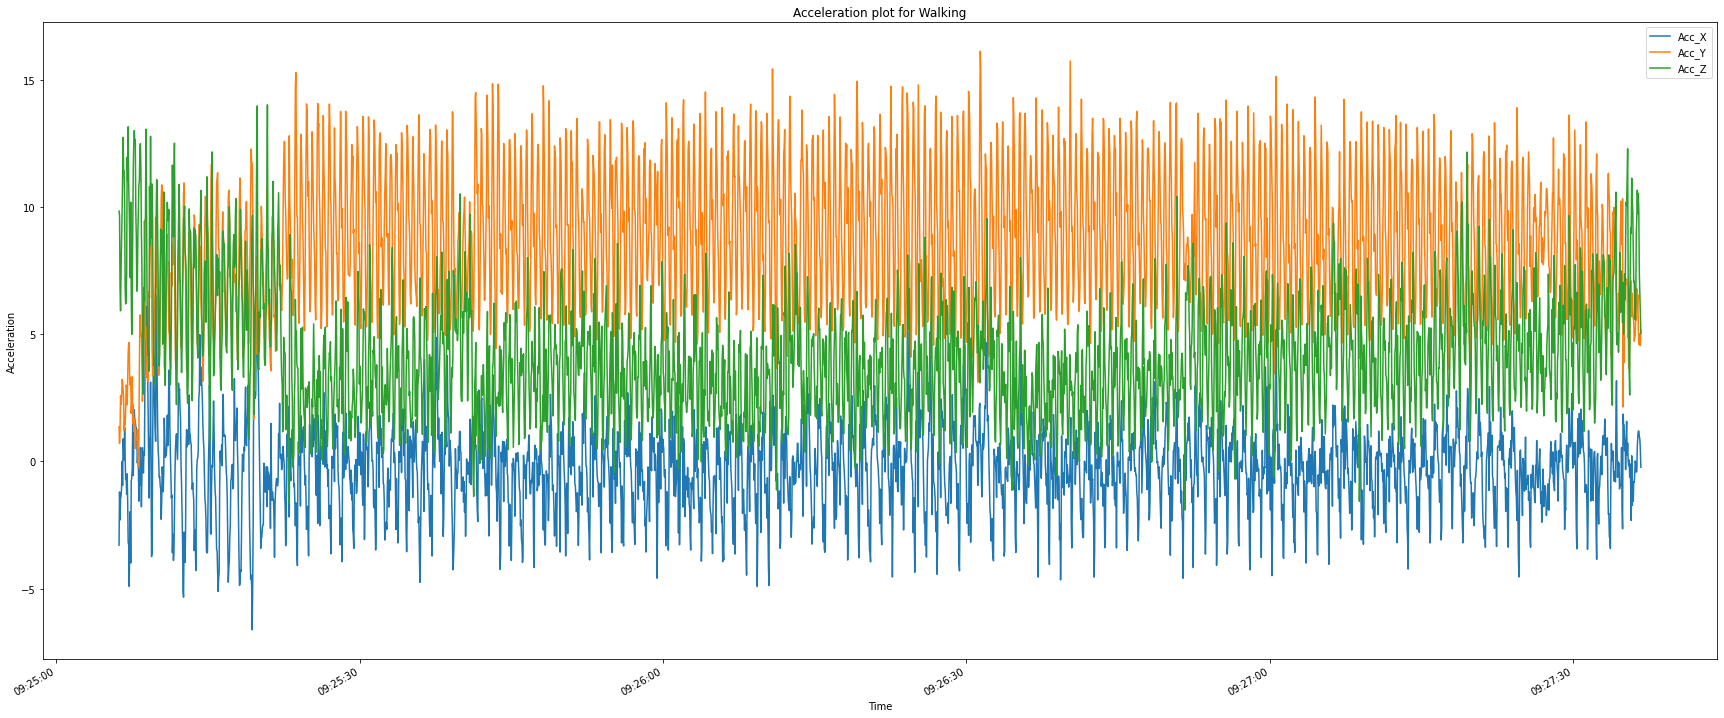

In [52]:
df_W.plot(y=['Acc_X', 'Acc_Y', 'Acc_Z'],x='Timestamp',kind='line',figsize=(30,13),title='Acceleration plot for Walking',ylabel='Acceleration',xlabel='Time')

Acceleration Plot for Jumping

In [53]:
df_J=df_activities.loc[df_activities['Activity'].isin(['Jumping'])]

<AxesSubplot:title={'center':'Acceleration plot for Jumping'}, xlabel='Time', ylabel='Acceleration'>

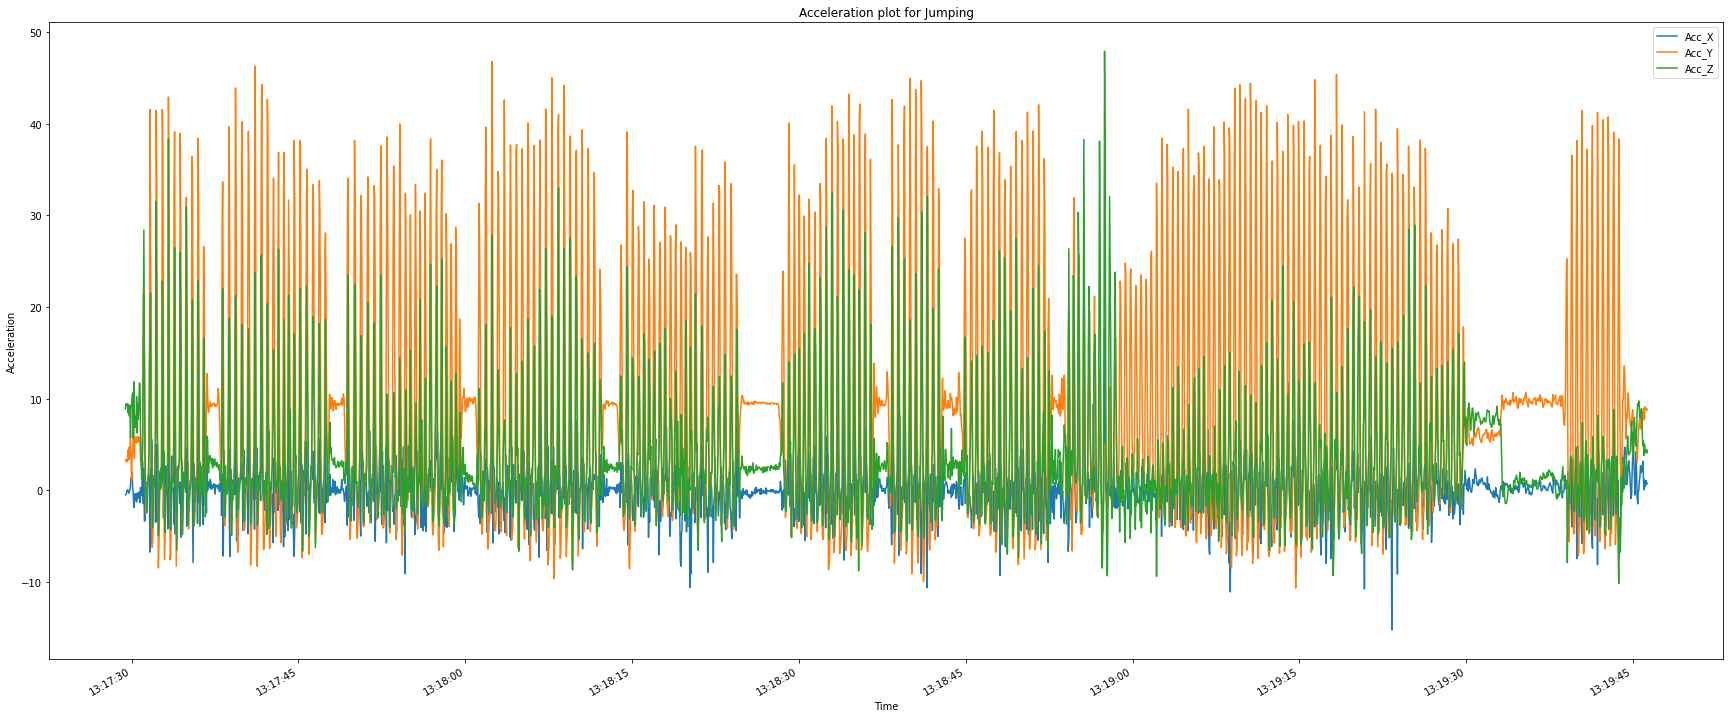

In [54]:
df_J.plot(y=['Acc_X', 'Acc_Y', 'Acc_Z'],x='Timestamp',kind='line',figsize=(30,13),title='Acceleration plot for Jumping',ylabel='Acceleration',xlabel='Time')

Acceleration Plot for Drop & Pickup activity

In [55]:
df_DP=df_activities.loc[df_activities['Activity'].isin(['Drop&Pickup'])]

<AxesSubplot:title={'center':'Acceleration plot for Drop & Pickup activity'}, xlabel='Time', ylabel='Acceleration'>

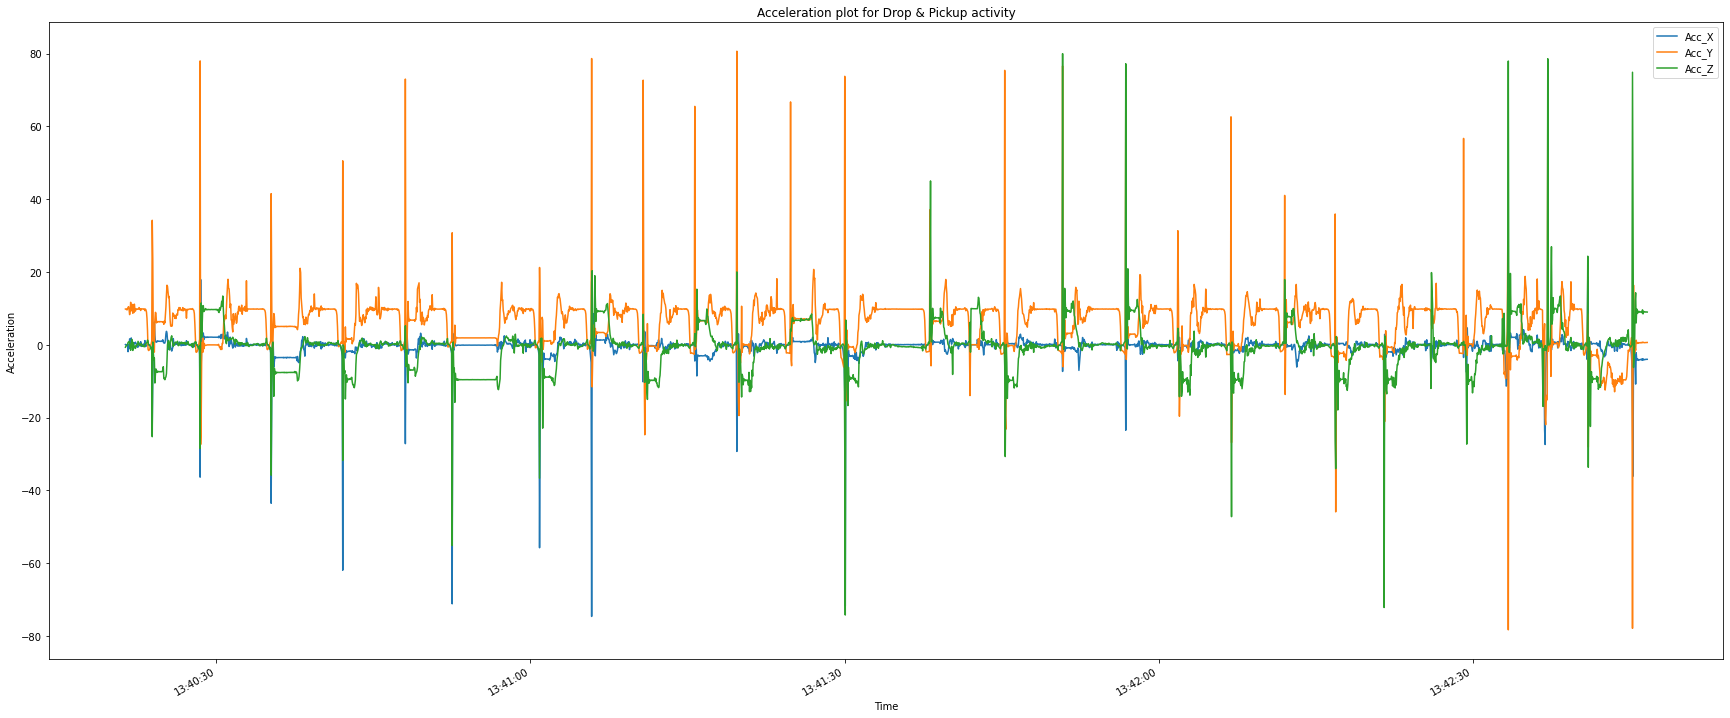

In [56]:
df_DP.plot(y=['Acc_X', 'Acc_Y', 'Acc_Z'],x='Timestamp',kind='line',figsize=(30,13),title='Acceleration plot for Drop & Pickup activity',ylabel='Acceleration',xlabel='Time')

As we can see the figure shows the acceleration plot which includes all three vectors (x,y,z) for each of the three activities. According to the figure with comparison to other activities, jumping is one of the most energetic activity with clear significant values. 

However the walking activity is also considered as energetic activity but the graph indicates that the all three vectors (x,y,z ) are more stable and constant . 

The plot for drop and pickup activity illustrates the dramatic spikes which are linked to our data. Due to the spikes, we are able to analyze that the vector (z) values have more dramatic acceleration. This effect has occurred because of the force of gravity which has a huge influence on acceleration.

ANGULAR VELOCITY

Angular velocity for Walking

<AxesSubplot:title={'center':'Angular velocity plot for Walking'}, xlabel='Time', ylabel='Angular velocity'>

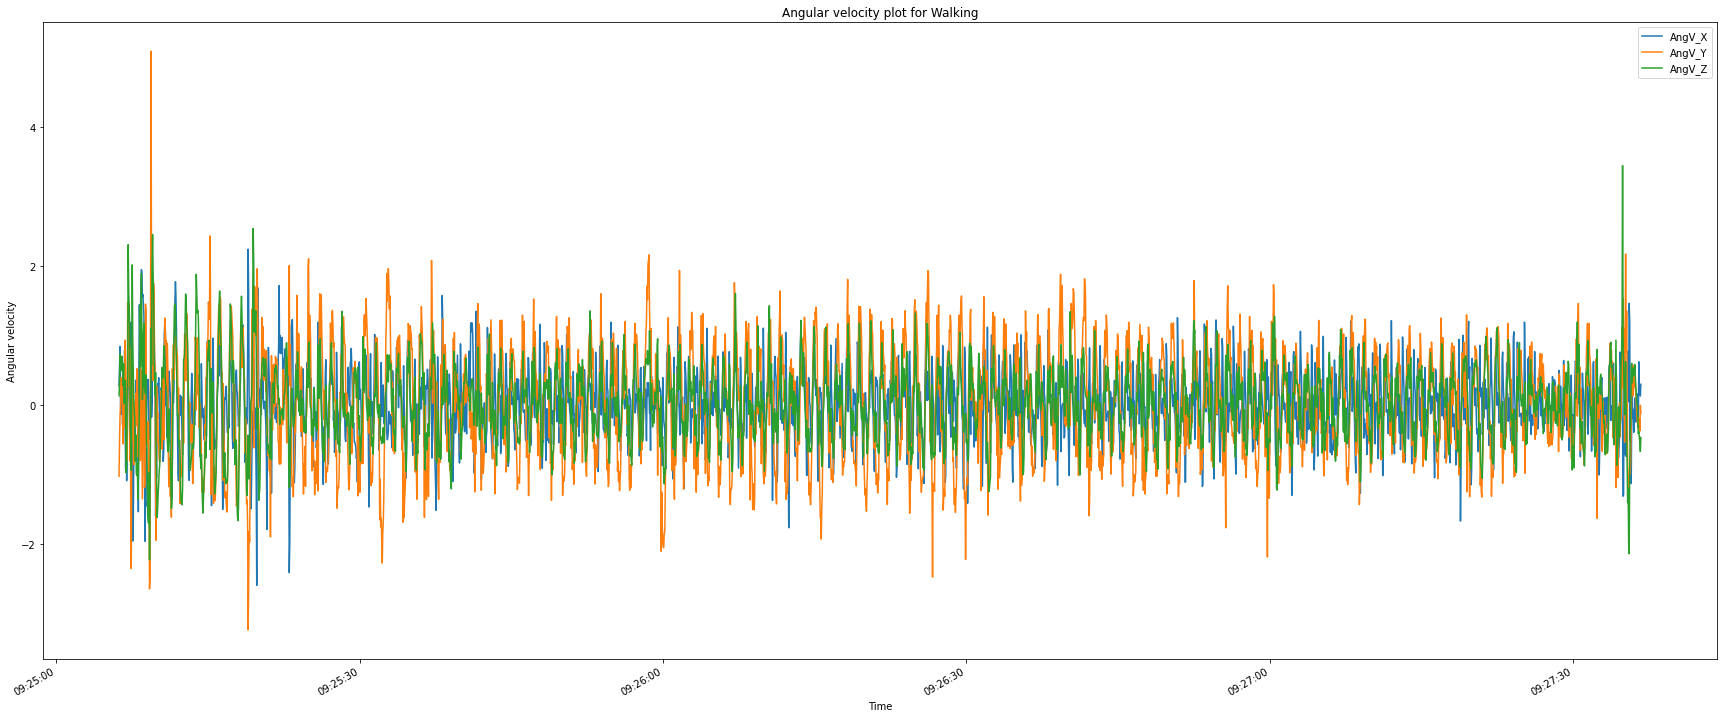

In [57]:
df_W.plot(y=['AngV_X','AngV_Y','AngV_Z'],x='Timestamp',kind='line',figsize=(30,13),title='Angular velocity plot for Walking',ylabel='Angular velocity',xlabel='Time')

Angular velocity for Jumping

<AxesSubplot:title={'center':'Angular velocity plot for Jumping'}, xlabel='Time', ylabel='Angular velocity'>

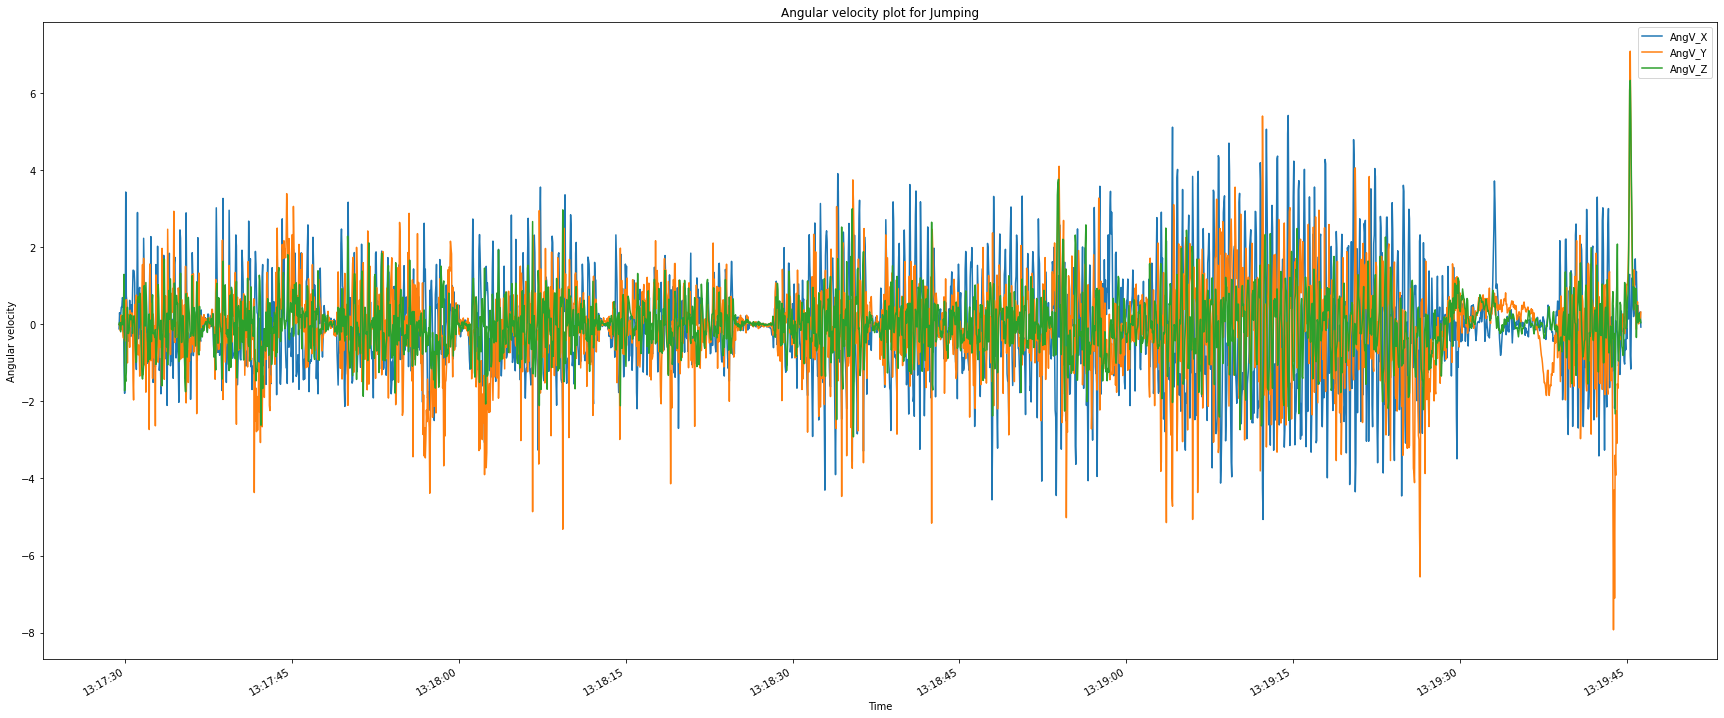

In [58]:
df_J.plot(y=['AngV_X','AngV_Y','AngV_Z'],x='Timestamp',kind='line',figsize=(30,13),title='Angular velocity plot for Jumping',ylabel='Angular velocity',xlabel='Time')

Angular velocity for Drop & Pickup activity

<AxesSubplot:title={'center':'Angular velocity plot for Drop & Pickup activity'}, xlabel='Time', ylabel='Angular velocity'>

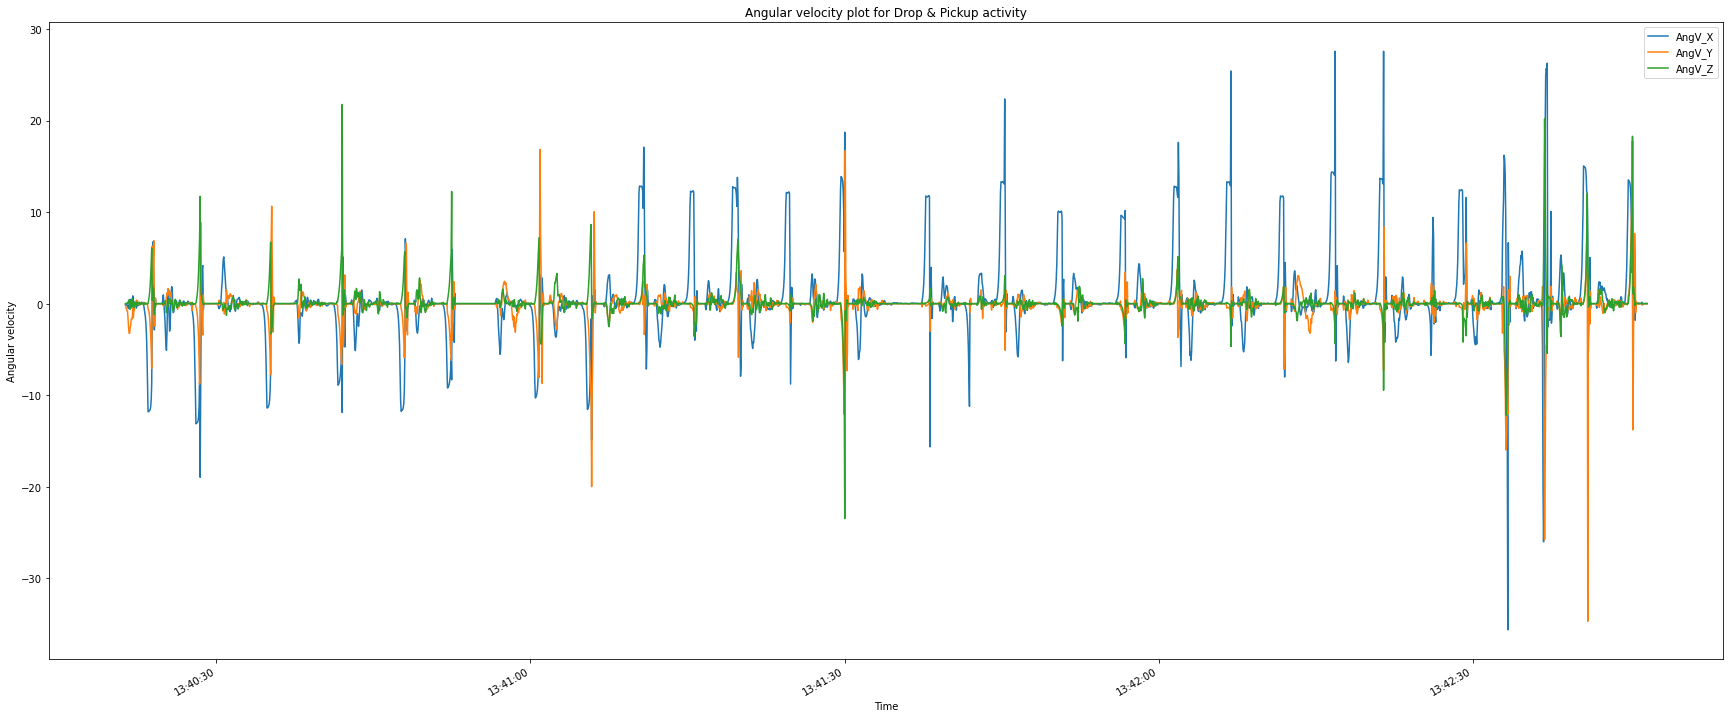

In [59]:
df_DP.plot(y=['AngV_X','AngV_Y','AngV_Z'],x='Timestamp',kind='line',figsize=(30,13),title='Angular velocity plot for Drop & Pickup activity',ylabel='Angular velocity',xlabel='Time')

Due to the plots, we are able to identify large spikes on the drop and pickup activity sensor plot. The spikes illustrate the exact moment of time when the subject (iPhone) was dropped. However, for all three activities (Walking, Jumping and Drop & Pickup), the all three vectors showed significant changes.

MAGNETIC FIELD

Magnetic Field for all activities

<AxesSubplot:title={'center':'Magnetic Field plot for all activities'}, xlabel='Activities', ylabel='Magnetic Field'>

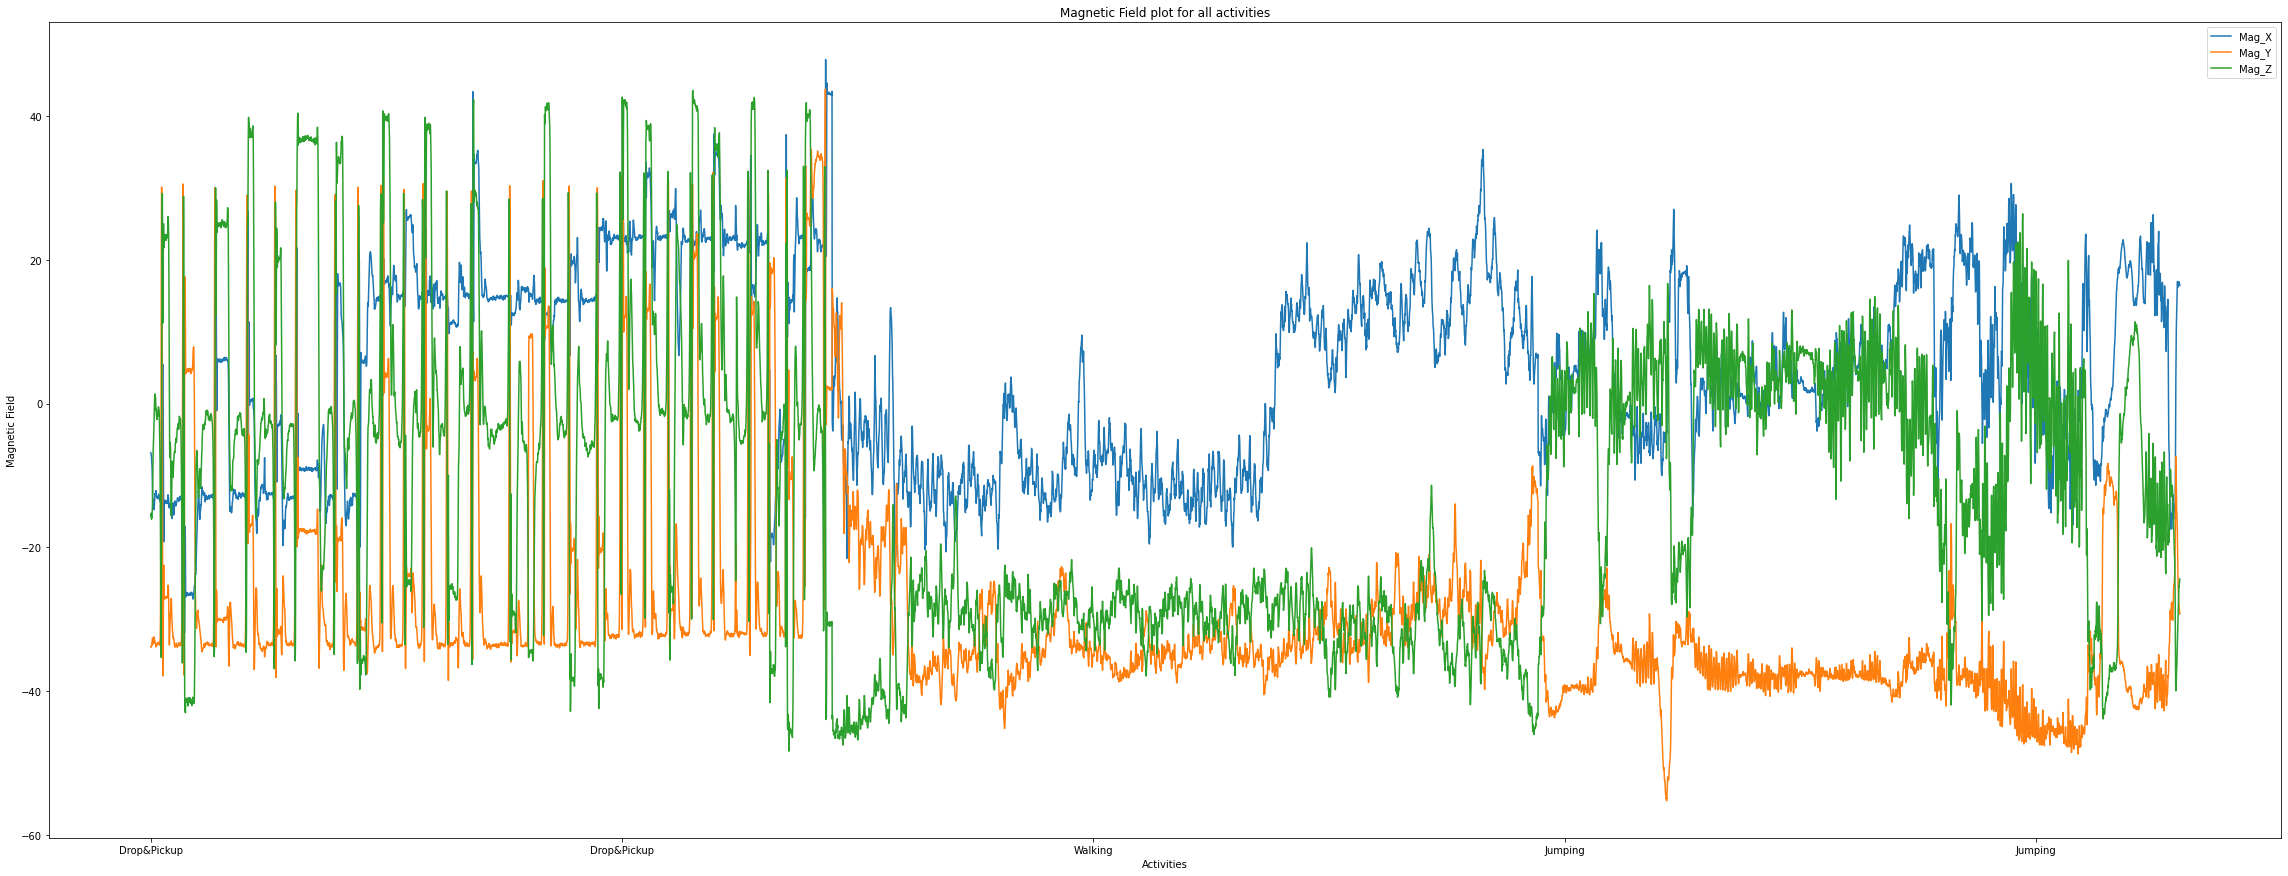

In [60]:
df_activities.plot(y=['Mag_X','Mag_Y','Mag_Z'],x='Activity',kind='line',figsize=(40,15),title='Magnetic Field plot for all activities',ylabel='Magnetic Field',xlabel='Activities')

ORIENTATION

Orientation for all activities

<AxesSubplot:title={'center':'Orientation plot for all activities'}, xlabel='Activities', ylabel='Orientation'>

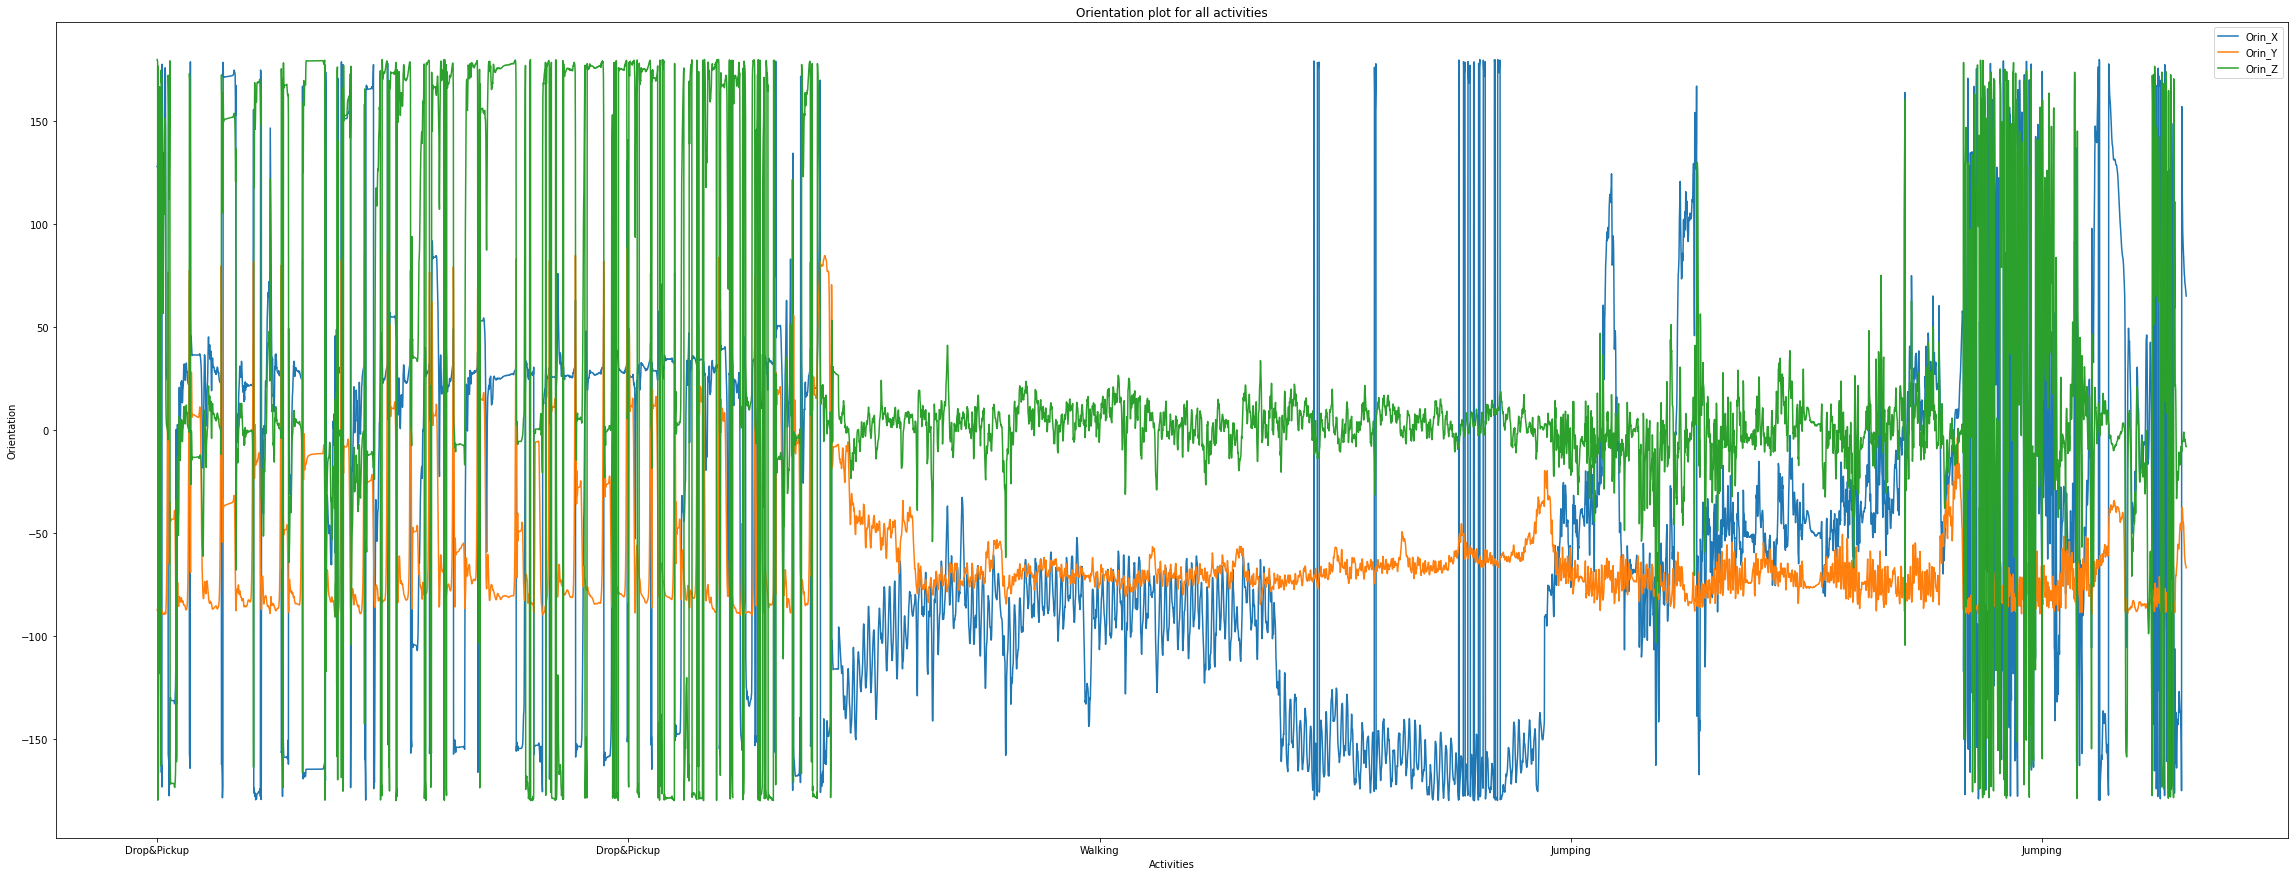

In [61]:
df_activities.plot(y=['Orin_X','Orin_Y','Orin_Z'],x='Activity',kind='line',figsize=(40,15),title='Orientation plot for all activities',ylabel='Orientation',xlabel='Activities')

In [62]:
df_activities.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008,Drop&Pickup
1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440,Drop&Pickup
2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264,Drop&Pickup
3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224,Drop&Pickup
4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411,Drop&Pickup


In [63]:
df_activities

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008,Drop&Pickup
1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440,Drop&Pickup
2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264,Drop&Pickup
3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224,Drop&Pickup
4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411,Drop&Pickup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,2021-10-14 13:19:46.071,0.419727,9.125324,4.503086,16.945076,-28.041767,-25.402069,69.826281,-64.941972,-5.502031,0.235801,0.013511,0.289482,Jumping
8613,2021-10-14 13:19:46.121,0.482746,8.904982,4.162245,16.579750,-28.217545,-25.513298,67.962617,-65.495209,-6.806262,0.135542,0.227402,0.231113,Jumping
8614,2021-10-14 13:19:46.171,1.081052,8.926986,4.083808,16.610832,-28.865643,-24.922562,66.665646,-65.646607,-7.396535,0.133819,0.090380,0.086350,Jumping
8615,2021-10-14 13:19:46.222,0.831820,8.728200,4.439618,16.594696,-29.028034,-24.468300,65.755989,-66.379555,-8.060789,0.324767,0.095359,0.129784,Jumping


Encoding target (Activities ) labels

In [64]:
label_encoder = LabelEncoder()
df_activities['Activity']= label_encoder.fit_transform(df_activities['Activity'])

In [65]:
df_activities.head(5)

,Timestamp,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z,Activity
0,2021-10-14 13:40:21.324,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008,0
1,2021-10-14 13:40:21.374,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440,0
2,2021-10-14 13:40:21.424,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264,0
3,2021-10-14 13:40:21.475,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224,0
4,2021-10-14 13:40:21.525,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411,0


In [66]:
df_activities['Activity'].value_counts()

2    2996
0    2892
1    2724
Name: Activity, dtype: int64

0 - Walking Activity

1 - Jumping Activity

2 - Drop & Pickup Activity 

In [67]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8612 entries, 0 to 8616
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  8612 non-null   datetime64[ns]
 1   Acc_X      8612 non-null   float64       
 2   Acc_Y      8612 non-null   float64       
 3   Acc_Z      8612 non-null   float64       
 4   Mag_X      8612 non-null   float64       
 5   Mag_Y      8612 non-null   float64       
 6   Mag_Z      8612 non-null   float64       
 7   Orin_X     8612 non-null   float64       
 8   Orin_Y     8612 non-null   float64       
 9   Orin_Z     8612 non-null   float64       
 10  AngV_X     8612 non-null   float64       
 11  AngV_Y     8612 non-null   float64       
 12  AngV_Z     8612 non-null   float64       
 13  Activity   8612 non-null   int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1009.2 KB


In [68]:
df_activities.to_csv('All data')

# Visualizing data using t-SNE

In [69]:
from sklearn.manifold import TSNE

In [70]:
X_for_tsne = df_activities.drop(['Activity','Timestamp'],axis=1)

In [71]:
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8612 samples in 0.006s...
[t-SNE] Computed neighbors for 8612 samples in 0.502s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8612
[t-SNE] Computed conditional probabilities for sample 2000 / 8612
[t-SNE] Computed conditional probabilities for sample 3000 / 8612
[t-SNE] Computed conditional probabilities for sample 4000 / 8612
[t-SNE] Computed conditional probabilities for sample 5000 / 8612
[t-SNE] Computed conditional probabilities for sample 6000 / 8612
[t-SNE] Computed conditional probabilities for sample 7000 / 8612
[t-SNE] Computed conditional probabilities for sample 8000 / 8612
[t-SNE] Computed conditional probabilities for sample 8612 / 8612
[t-SNE] Mean sigma: 3.752040
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.818069
[t-SNE] KL divergence after 1000 iterations: 0.761602


<AxesSubplot:>

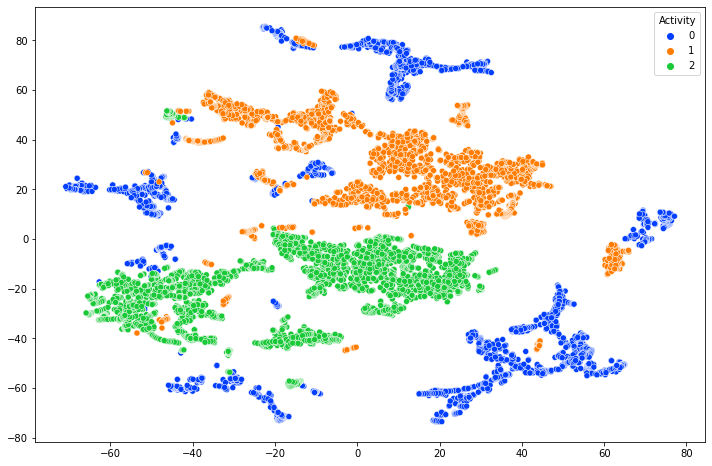

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df_activities["Activity"],palette="bright")

0 - Walking Activity

1 - Jumping Activity

2 - Drop & Pickup Activity

 Due to using t-SNE, we can visualize all the three activities seperately in a 2D space

# Modeling

In [73]:
X= df_activities.drop(['Activity','Timestamp'],axis=1)

In [74]:
X.head(5)

,Acc_X,Acc_Y,Acc_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,AngV_X,AngV_Y,AngV_Z
0,0.059277,9.804911,-0.685874,-6.839157,-33.814117,-15.594273,127.911828,-87.230436,179.978090,-0.069952,-0.220849,-0.001008
1,-0.087119,9.853859,-0.373024,-6.893135,-33.899960,-15.393707,127.833119,-87.452951,179.300691,-0.178261,-0.403390,0.031440
2,0.028141,9.798175,-0.269739,-7.255005,-33.819160,-15.255764,128.428930,-87.948594,178.880301,-0.089927,-0.568693,0.044264
3,-0.114811,9.556278,-0.239652,-7.396950,-33.735928,-16.084511,131.649373,-88.322716,-179.716323,-0.216975,-0.775759,-0.039224
4,-0.009580,9.846225,0.103734,-7.908173,-33.489986,-15.796833,130.353466,-88.917042,176.731065,-0.187594,-0.837408,0.104411


In [75]:
y = df_activities["Activity"]

In [76]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Activity, dtype: int64

In [77]:
y.tail(5)

8612    1
8613    1
8614    1
8615    1
8616    1
Name: Activity, dtype: int64

Spliting data into train test split

In [78]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
print(f"""
x_train shape: {X_train.shape}, 
y_train shape: {y_train.shape},
X_test shape: {X_test.shape},
y_test shape: {y_test.shape}
""" )


x_train shape: (6889, 12), 
y_train shape: (6889,),
X_test shape: (1723, 12),
y_test shape: (1723,)



# Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Building ML models

# 1.Logistic regression model with Hyperparameter tuning and cross validation

In [82]:
logreg_classifier = LogisticRegression()
parameters ={"C": np.logspace(-4, 5, 20),
               "solver": ["liblinear"]}
logreg_classifier_rs = RandomizedSearchCV(logreg_classifier, param_distributions=parameters, cv=5,random_state = 42)
logreg_classifier_rs.fit(X_train, y_train)
y_pred_log = logreg_classifier_rs.predict(X_test)

In [83]:
logreg_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_log)
print("Logistic Regression Accuracy : ", logreg_accuracy)

Logistic Regression Accuracy :  0.8868253047011028


In [84]:
print(confusion_matrix(y_test, y_pred_log))

[[524  31  32]
 [ 67 444  32]
 [ 14  19 560]]


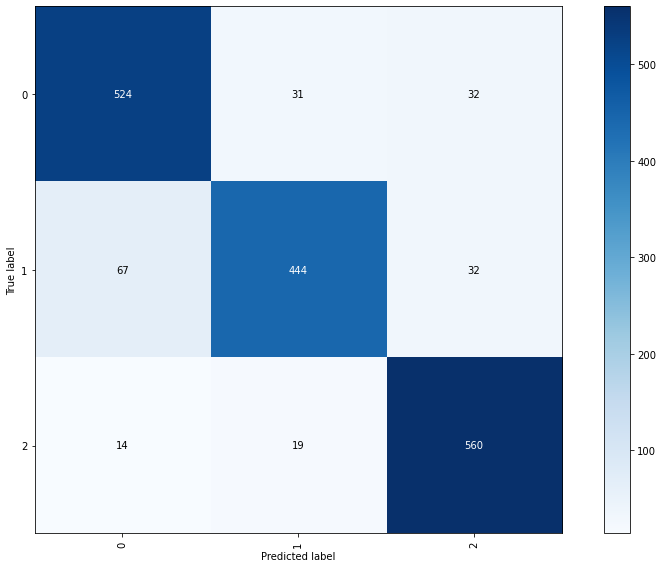

In [85]:
cm = confusion_matrix(y_test.values,y_pred_log)
plot_confusion_matrix(cm, np.unique(y_pred_log))

In [86]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       587
           1       0.90      0.82      0.86       543
           2       0.90      0.94      0.92       593

    accuracy                           0.89      1723
   macro avg       0.89      0.88      0.89      1723
weighted avg       0.89      0.89      0.89      1723



# 2.KNeighborsClassifier model

In [87]:
#Create KNN Object.
knn = KNeighborsClassifier()
#Training the model.
knn.fit(X_train, y_train)
#Predict test data set.
y_pred_knn = knn.predict(X_test)

In [88]:
knn_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_knn)
print("KNeighbors Classifier Accuracy: ",knn_accuracy)

KNeighbors Classifier Accuracy:  0.991874637260592


In [89]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       587
           1       0.99      0.99      0.99       543
           2       0.99      1.00      0.99       593

    accuracy                           0.99      1723
   macro avg       0.99      0.99      0.99      1723
weighted avg       0.99      0.99      0.99      1723



In [90]:
print(confusion_matrix(y_test, y_pred_knn))

[[576   6   5]
 [  2 540   1]
 [  0   0 593]]


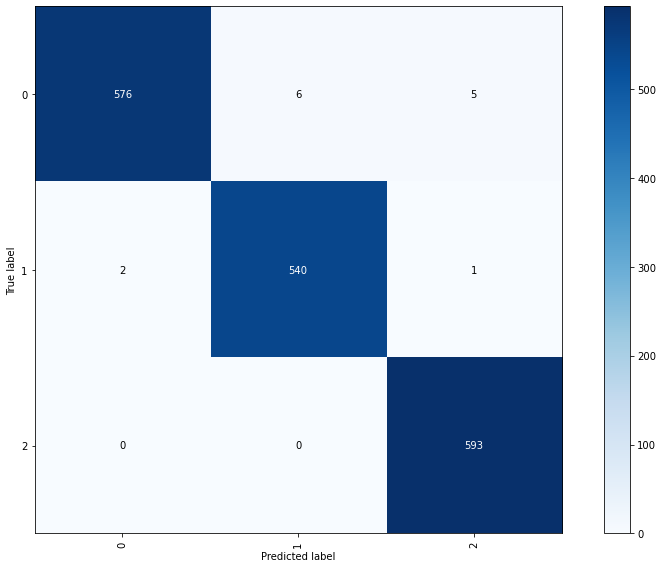

In [91]:
cm = confusion_matrix(y_test.values,y_pred_knn)
plot_confusion_matrix(cm, np.unique(y_pred_knn))

# 3.Decision tree model with Hyperparameter tuning and cross validation

In [92]:
dt_classifier = DecisionTreeClassifier()
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred_dt = dt_classifier_rs.predict(X_test)

In [93]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_dt)
print("Decision tree Accuracy : ", dt_accuracy)

Decision tree Accuracy :  0.9686593151479976


In [94]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       587
           1       0.98      0.96      0.97       543
           2       0.96      0.98      0.97       593

    accuracy                           0.97      1723
   macro avg       0.97      0.97      0.97      1723
weighted avg       0.97      0.97      0.97      1723



In [95]:
print(confusion_matrix(y_test, y_pred_dt))

[[563   7  17]
 [ 14 522   7]
 [  3   6 584]]


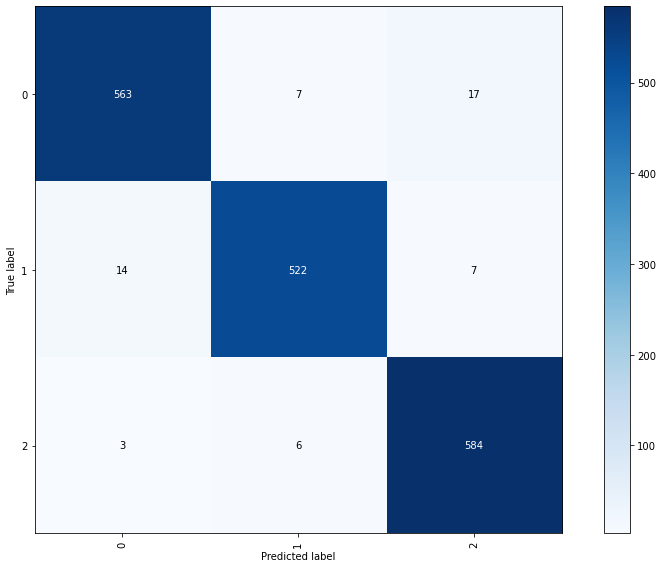

In [96]:
cm = confusion_matrix(y_test.values,y_pred_dt)
plot_confusion_matrix(cm, np.unique(y_pred_dt))

# 4. Random Forest Classifier with Hyperparameter tuning and cross validation

In [97]:
rf_classifier = RandomForestClassifier()
params = {"n_estimators": np.arange(10,1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(5, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred_rf = rf_classifier_rs.predict(X_test)

In [98]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_rf)
print("Random forest Accuracy: ", rf_accuracy)

Random forest Accuracy:  0.9924550203134068


In [99]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.98      1.00      0.99       543
           2       0.99      0.99      0.99       593

    accuracy                           0.99      1723
   macro avg       0.99      0.99      0.99      1723
weighted avg       0.99      0.99      0.99      1723



In [100]:
print(confusion_matrix(y_test, y_pred_rf))

[[581   5   1]
 [  0 541   2]
 [  0   5 588]]


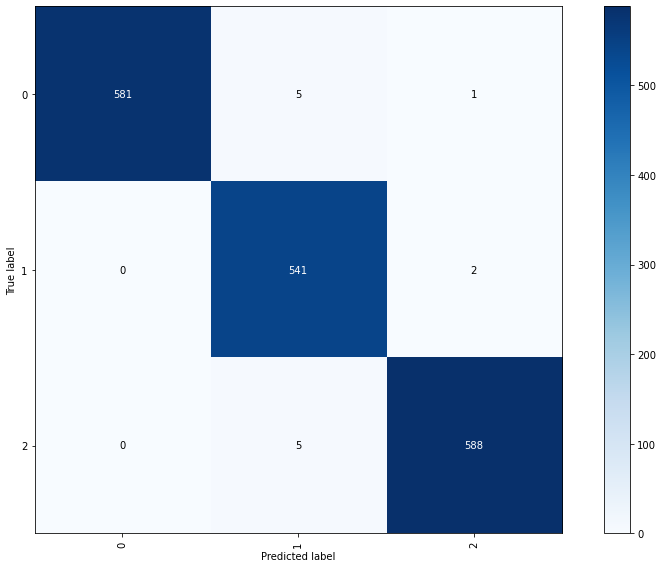

In [101]:
cm = confusion_matrix(y_test.values,y_pred_rf)
plot_confusion_matrix(cm, np.unique(y_pred_rf))

### Model Comparison

In [102]:
models = {"Logistic Regression": logreg_accuracy,
         "KNN": knn_accuracy,
          "Decision Tree":dt_accuracy,
         "Random Forest": rf_accuracy}

In [103]:
model_compare = pd.DataFrame(models,index=["Accuracy"])

print(model_compare)

          Logistic Regression       KNN  Decision Tree  Random Forest
Accuracy             0.886825  0.991875       0.968659       0.992455


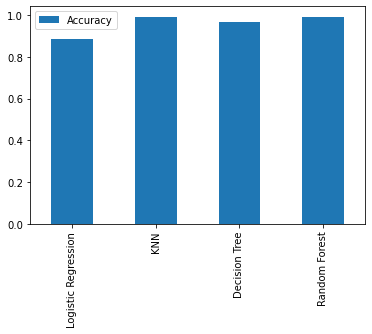

In [104]:
model_compare.T.plot.bar();